In [1]:
# Importación de librerías

# Datos
from sklearn import datasets

# Preprocesamiento
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier

# Modelo
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor

# Métricas
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import confusion_matrix, classification_report

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Cargamos datos
df_fruits_org = pd.read_csv(r"C:\Users\apico\Downloads\date_fruits.csv")
df_fruits_org

,area,perimeter,major_axis,minor_axis,eccentricity,eqdiasq,solidity,convex_area,extent,aspect_ratio,roundness,compactness,target
0,422163,2378.9080,837.8484,645.6693,0.6373,733.1539,0.9947,424428,0.7831,1.2976,0.9374,0.8750,BERHI
1,338136,2085.1440,723.8198,595.2073,0.5690,656.1464,0.9974,339014,0.7795,1.2161,0.9773,0.9065,BERHI
2,526843,2647.3940,940.7379,715.3638,0.6494,819.0222,0.9962,528876,0.7657,1.3150,0.9446,0.8706,BERHI
3,416063,2351.2100,827.9804,645.2988,0.6266,727.8378,0.9948,418255,0.7759,1.2831,0.9458,0.8791,BERHI
4,347562,2160.3540,763.9877,582.8359,0.6465,665.2291,0.9908,350797,0.7569,1.3108,0.9358,0.8707,BERHI
...,...,...,...,...,...,...,...,...,...,...,...,...,...
893,255403,1925.3650,691.8453,477.1796,0.7241,570.2536,0.9785,261028,0.7269,1.4499,0.8658,0.8243,SOGAY
894,365924,2664.8230,855.4633,551.5447,0.7644,682.5752,0.9466,386566,0.6695,1.5510,0.6475,0.7979,SOGAY
895,254330,1926.7360,747.4943,435.6219,0.8126,569.0545,0.9925,256255,0.7240,1.7159,0.8609,0.7613,SOGAY
896,238955,1906.2679,716.6485,441.8297,0.7873,551.5859,0.9604,248795,0.6954,1.6220,0.8263,0.7697,SOGAY


In [3]:
# Comprobamos clases y unidades de cada
df_fruits_org['target'].value_counts()

DOKOL     204
SAFAVI    199
ROTANA    166
DEGLET     98
SOGAY      94
IRAQI      72
BERHI      65
Name: target, dtype: int64

In [4]:
df_fruits = df_fruits_org

# Seleccionar columnas numéricas

columnas_numericas = df_fruits.select_dtypes(include=['int', 'float'])

# Seleccionar columnas no numéricas

columnas_no_numericas = df_fruits.select_dtypes(exclude=['int', 'float'])

In [5]:
# Normalizamos los datos escalandalos entre -1 a 1.

scaler = MinMaxScaler(feature_range=(-1, 1))
columnas_numericas = pd.DataFrame(scaler.fit_transform(columnas_numericas), columns=columnas_numericas.columns)

# Imprimir el DataFrame normalizado
columnas_numericas

,area,perimeter,major_axis,minor_axis,eccentricity,eqdiasq,solidity,convex_area,extent,aspect_ratio,roundness,compactness
0,0.544549,0.544157,0.131209,0.683881,-0.107143,0.743024,0.966418,0.534216,0.574876,-0.999131,0.917943,0.799137
1,0.235669,0.234960,-0.126192,0.551811,-0.315629,0.546459,1.000000,0.223812,0.553940,-0.999436,1.000000,0.867098
2,0.929348,0.826749,0.363465,0.866287,-0.070208,0.962208,0.985075,0.913792,0.473684,-0.999066,0.932751,0.789644
3,0.522126,0.515004,0.108933,0.682912,-0.139805,0.729455,0.967662,0.511783,0.533004,-0.999185,0.935219,0.807983
4,0.270319,0.314121,-0.035520,0.519433,-0.079060,0.569643,0.917910,0.266633,0.422507,-0.999081,0.914653,0.789860
...,...,...,...,...,...,...,...,...,...,...,...,...
893,-0.068454,0.066786,-0.198369,0.242907,0.157814,0.327213,0.764925,-0.059598,0.248037,-0.998561,0.770694,0.689752
894,0.337817,0.845094,0.170972,0.437537,0.280830,0.613920,0.368159,0.396621,-0.085781,-0.998182,0.321748,0.632794
895,-0.072398,0.068229,-0.072751,0.134142,0.427961,0.324152,0.939055,-0.076943,0.231172,-0.997565,0.760617,0.553830
896,-0.128916,0.046686,-0.142380,0.150389,0.350733,0.279563,0.539801,-0.104054,0.064844,-0.997917,0.689460,0.571953


## Aplicación Árbol de Decisión(Clasificación)

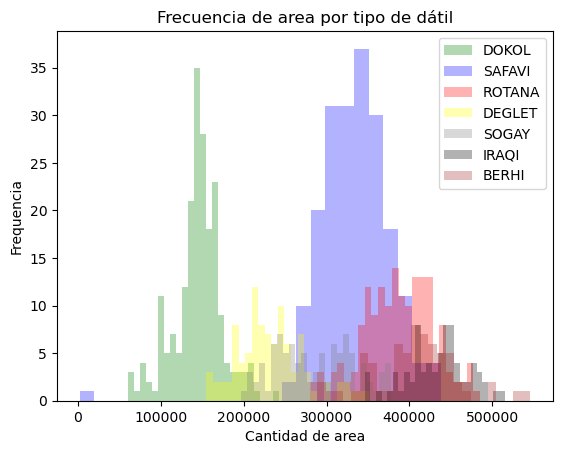

In [6]:
# Histograma de la variable area

x1 = df_fruits.loc[df_fruits.target=='DOKOL', 'area']
x2 = df_fruits.loc[df_fruits.target=='SAFAVI', 'area']
x3 = df_fruits.loc[df_fruits.target=='ROTANA', 'area']
x4 = df_fruits.loc[df_fruits.target=='DEGLET', 'area']
x5 = df_fruits.loc[df_fruits.target=='SOGAY', 'area']
x6 = df_fruits.loc[df_fruits.target=='IRAQI', 'area']
x7 = df_fruits.loc[df_fruits.target=='BERHI', 'area']

# Argumentos para los colores

kwargs = dict(alpha=0.3,bins=25)

plt.hist(x1, **kwargs, color='green', label='DOKOL')
plt.hist(x2, **kwargs, color='blue', label='SAFAVI')
plt.hist(x3, **kwargs, color='red', label='ROTANA')
plt.hist(x4, **kwargs, color='yellow', label='DEGLET')
plt.hist(x5, **kwargs, color='grey', label='SOGAY')
plt.hist(x6, **kwargs, color='black', label='IRAQI')
plt.hist(x7, **kwargs, color='brown', label='BERHI')
plt.gca().set(title='Frecuencia de area por tipo de dátil', xlabel='Cantidad de area', ylabel='Frequencia')

plt.legend();

### Preprocesamiento de datos
#### Selección de datos

In [7]:
# Seleccionamos las características a tener en cuenta para crear el modelo

X = columnas_numericas[['area','roundness']]
y = columnas_no_numericas['target']

#### División de datos (conjuntos de entrenamiento y de prueba)

In [8]:
# Dividimos los datos, 80% para entrenamiento y 20% para la prueba

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Conjunto de desarrollo, conjunto de validación

X_train, X_val, y_train, y_val = train_test_split(X_train,y_train,test_size=0.25, random_state= 1)

### Creación del modelo de Clasificación

In [9]:
clf = DecisionTreeClassifier(max_depth=5, random_state=0)

clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5, random_state=0)

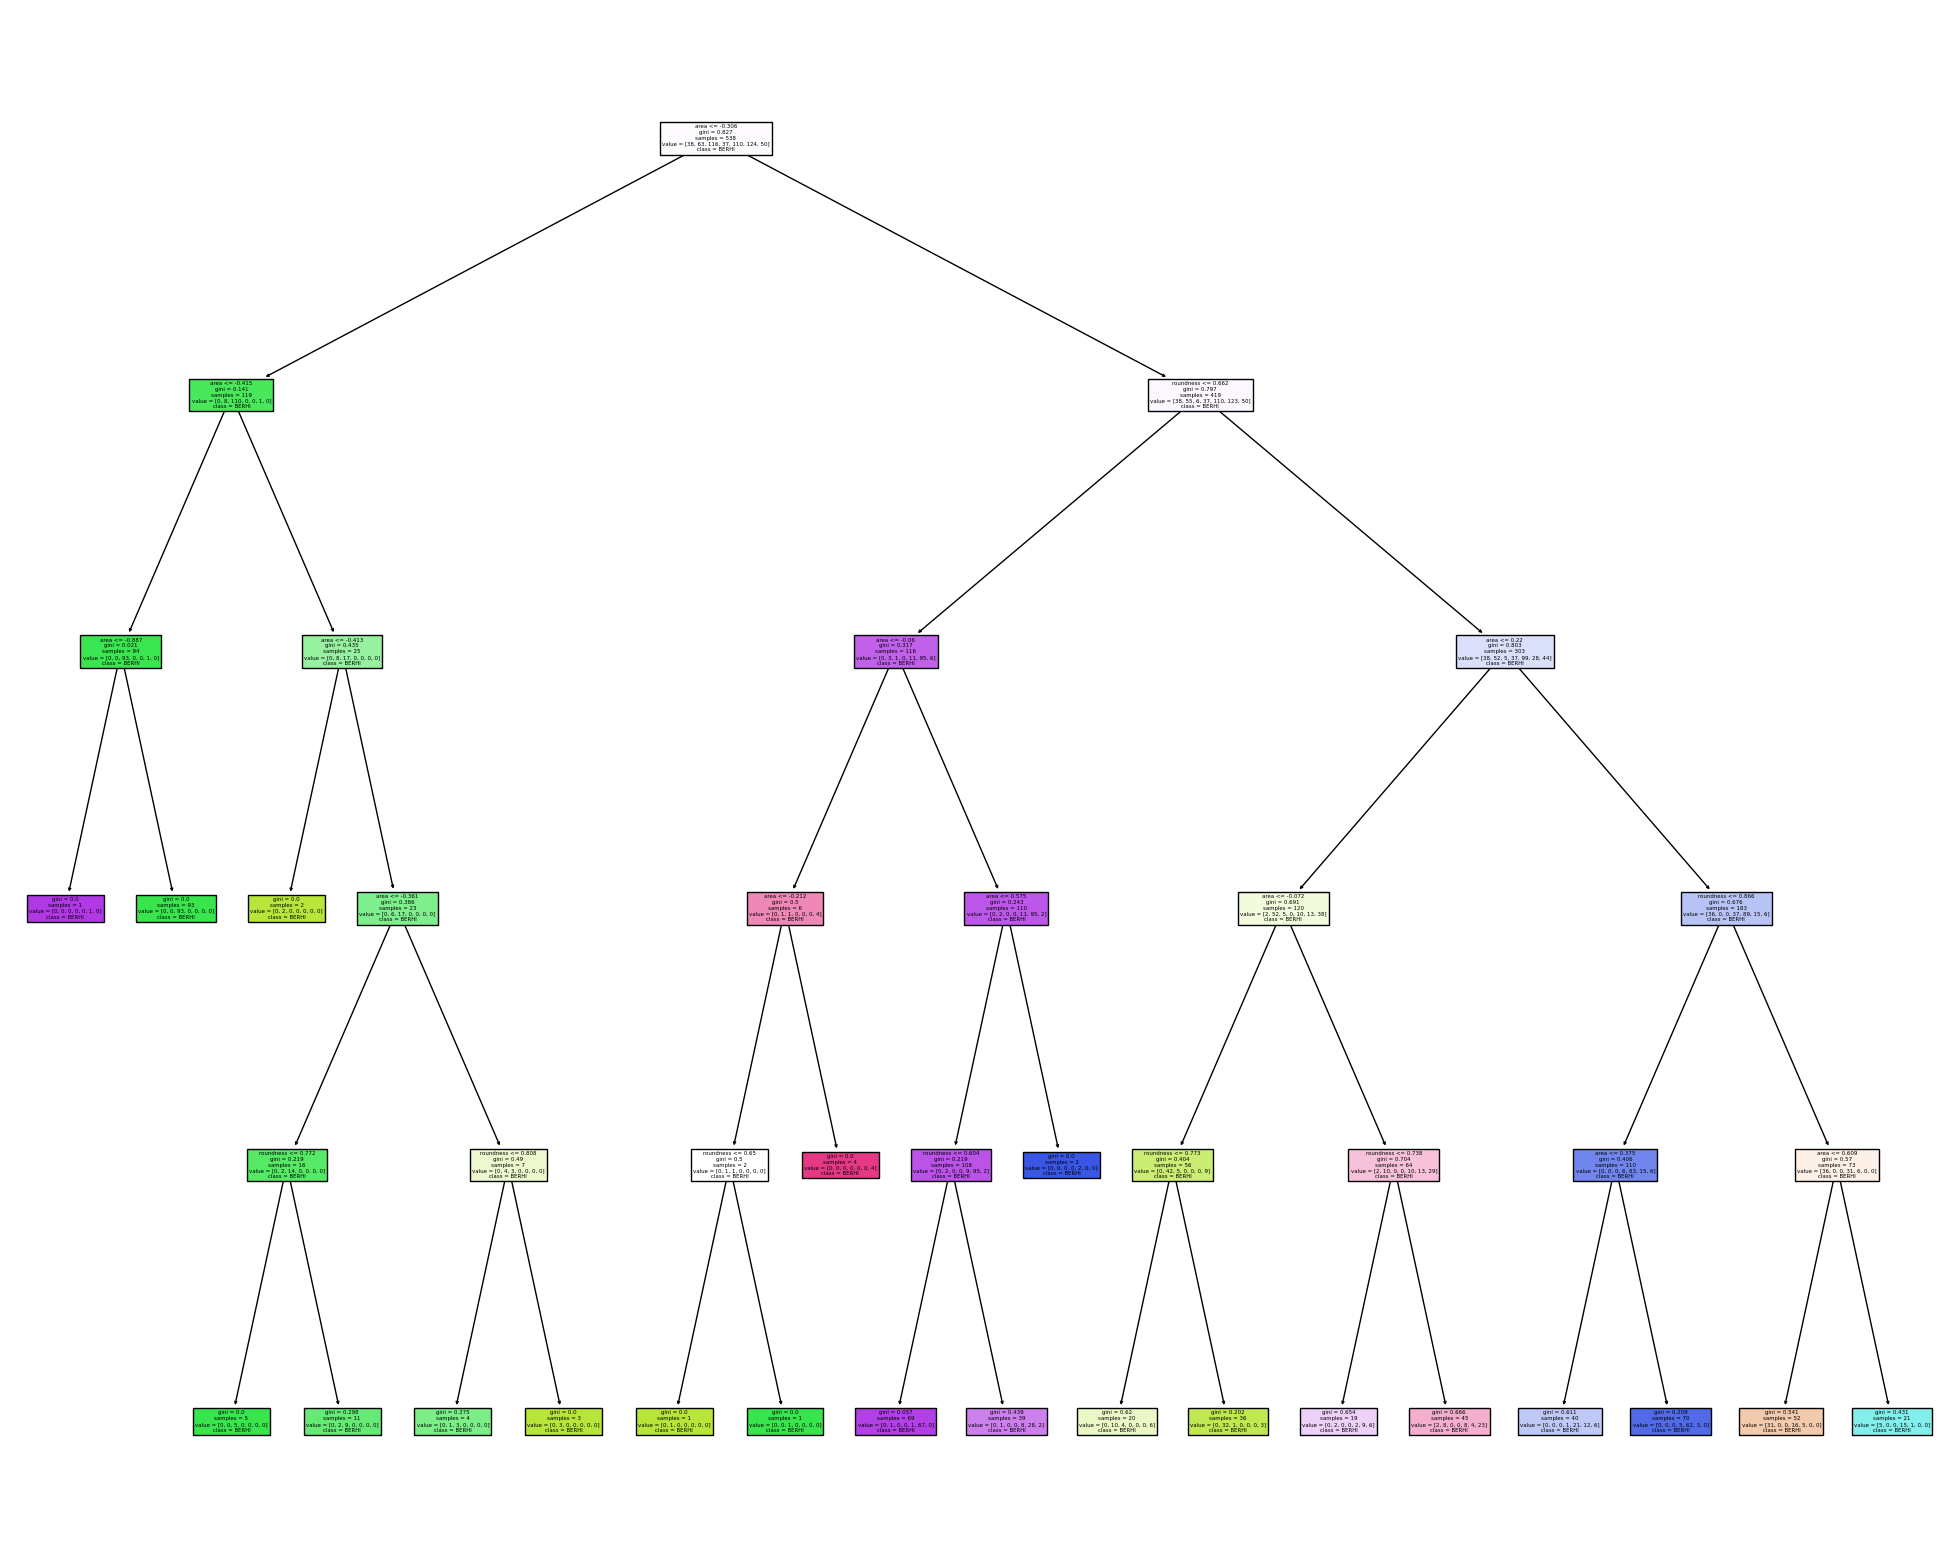

In [10]:
# Visualización del árbol
fig = plt.figure(figsize = (25,20))
_ = tree.plot_tree(clf,feature_names = X.columns, class_names = df_fruits.target, filled = True)

### Predicción del conjunto de datos de validación

In [11]:
y_pred = clf.predict(X_val)

### Validación de resultados

In [12]:
df_resultados =  pd.DataFrame(columns=['Valor Real', 'Valor Predicho'])
df_resultados['Valor Real'] = y_val
df_resultados['Valor Predicho'] = y_pred
df_resultados.head()

,Valor Real,Valor Predicho
68,DEGLET,SAFAVI
397,IRAQI,BERHI
208,DOKOL,DOKOL
91,DEGLET,DEGLET
251,DOKOL,DOKOL


### Matriz de confusión

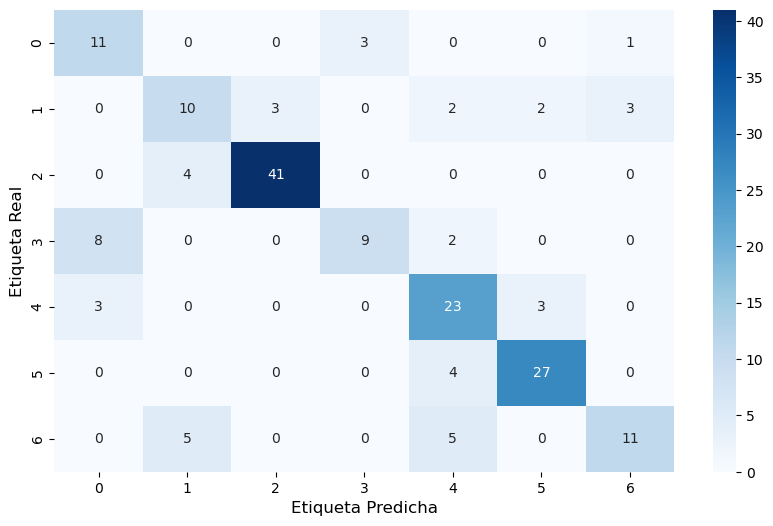

In [13]:
cf_matrix = confusion_matrix(y_val, y_pred)
fig, ax = plt.subplots(figsize=(10,6))
shm = sns.heatmap(cf_matrix, annot=True, cmap='Blues', ax=ax)
shm.set_xlabel('Etiqueta Predicha', fontsize=12)
shm.set_ylabel('Etiqueta Real', fontsize=12)
plt.show()

### Métricas

In [14]:
print(classification_report(y_val, y_pred))

              precision    recall  f1-score   support

       BERHI       0.50      0.73      0.59        15
      DEGLET       0.53      0.50      0.51        20
       DOKOL       0.93      0.91      0.92        45
       IRAQI       0.75      0.47      0.58        19
      ROTANA       0.64      0.79      0.71        29
      SAFAVI       0.84      0.87      0.86        31
       SOGAY       0.73      0.52      0.61        21

    accuracy                           0.73       180
   macro avg       0.70      0.69      0.68       180
weighted avg       0.75      0.73      0.73       180



### Predicción del conjunto de datos de prueba

In [15]:
y_pred = clf.predict(X_test)

### Validación de resultados

In [16]:
df_resultados =  pd.DataFrame(columns=['Valor Real', 'Valor Predicho'])
df_resultados['Valor Real'] = y_test
df_resultados['Valor Predicho'] = y_pred
df_resultados.head()

,Valor Real,Valor Predicho
792,SAFAVI,ROTANA
60,BERHI,IRAQI
420,IRAQI,IRAQI
31,BERHI,SOGAY
193,DOKOL,DOKOL


### Matriz de confusión

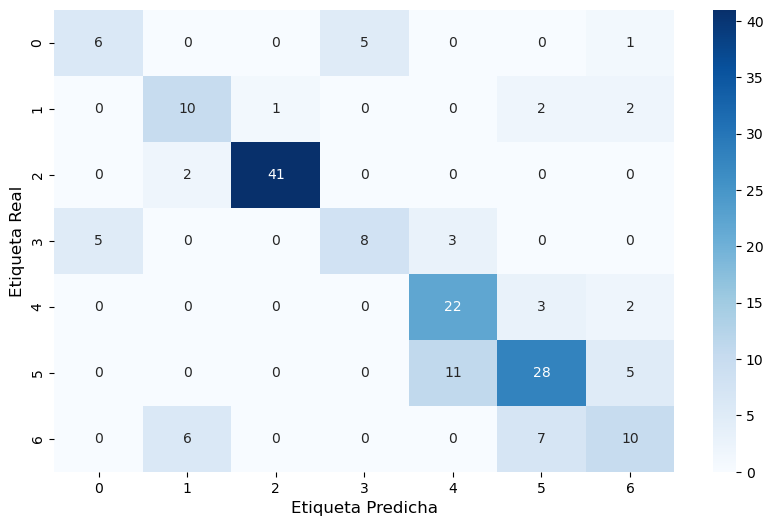

In [17]:
cf_matrix = confusion_matrix(y_test, y_pred)

fig, ax = plt.subplots(figsize=(10,6))
shm = sns.heatmap(cf_matrix, annot=True, cmap='Blues', ax=ax)
shm.set_xlabel('Etiqueta Predicha', fontsize=12)
shm.set_ylabel('Etiqueta Real', fontsize=12)
plt.show()

### Métricas

In [18]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       BERHI       0.55      0.50      0.52        12
      DEGLET       0.56      0.67      0.61        15
       DOKOL       0.98      0.95      0.96        43
       IRAQI       0.62      0.50      0.55        16
      ROTANA       0.61      0.81      0.70        27
      SAFAVI       0.70      0.64      0.67        44
       SOGAY       0.50      0.43      0.47        23

    accuracy                           0.69       180
   macro avg       0.64      0.64      0.64       180
weighted avg       0.70      0.69      0.69       180



## Aplicación modelo KNN

In [19]:
# Contamos el numero total de clases existentes en el DataFrame
class_counts = df_fruits_org['target'].value_counts()
class_counts 

DOKOL     204
SAFAVI    199
ROTANA    166
DEGLET     98
SOGAY      94
IRAQI      72
BERHI      65
Name: target, dtype: int64

In [37]:
# Seleccionar columnas numéricas

columnas_numericas2 = df_fruits_org.select_dtypes(include=['int', 'float'])

# Seleccionar columnas no numéricas

columnas_no_numericas2 = df_fruits_org.select_dtypes(exclude=['int', 'float'])

In [38]:
# Normalizamos los datos escalandalos entre -1 a 1.

scaler = MinMaxScaler(feature_range=(-1, 1))
columnas_numericas2 = pd.DataFrame(scaler.fit_transform(columnas_numericas2), columns=columnas_numericas2.columns)

# Imprimir el DataFrame normalizado
columnas_numericas2

,area,perimeter,major_axis,minor_axis,eccentricity,eqdiasq,solidity,convex_area,extent,aspect_ratio,roundness,compactness
0,0.544549,0.544157,0.131209,0.683881,-0.107143,0.743024,0.966418,0.534216,0.574876,-0.999131,0.917943,0.799137
1,0.235669,0.234960,-0.126192,0.551811,-0.315629,0.546459,1.000000,0.223812,0.553940,-0.999436,1.000000,0.867098
2,0.929348,0.826749,0.363465,0.866287,-0.070208,0.962208,0.985075,0.913792,0.473684,-0.999066,0.932751,0.789644
3,0.522126,0.515004,0.108933,0.682912,-0.139805,0.729455,0.967662,0.511783,0.533004,-0.999185,0.935219,0.807983
4,0.270319,0.314121,-0.035520,0.519433,-0.079060,0.569643,0.917910,0.266633,0.422507,-0.999081,0.914653,0.789860
...,...,...,...,...,...,...,...,...,...,...,...,...
893,-0.068454,0.066786,-0.198369,0.242907,0.157814,0.327213,0.764925,-0.059598,0.248037,-0.998561,0.770694,0.689752
894,0.337817,0.845094,0.170972,0.437537,0.280830,0.613920,0.368159,0.396621,-0.085781,-0.998182,0.321748,0.632794
895,-0.072398,0.068229,-0.072751,0.134142,0.427961,0.324152,0.939055,-0.076943,0.231172,-0.997565,0.760617,0.553830
896,-0.128916,0.046686,-0.142380,0.150389,0.350733,0.279563,0.539801,-0.104054,0.064844,-0.997917,0.689460,0.571953


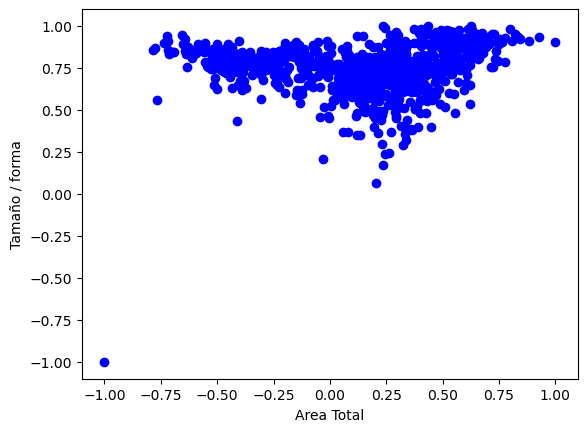

In [39]:
# Visualización de los datos

plt.scatter(columnas_numericas2['area'],columnas_numericas2['roundness'], color = 'blue')
plt.xlabel('Area Total')
plt.ylabel('Tamaño / forma')
plt.show()

In [40]:
# Verificamos el número de registros por clase
columnas_no_numericas2['target'].value_counts()

DOKOL     204
SAFAVI    199
ROTANA    166
DEGLET     98
SOGAY      94
IRAQI      72
BERHI      65
Name: target, dtype: int64

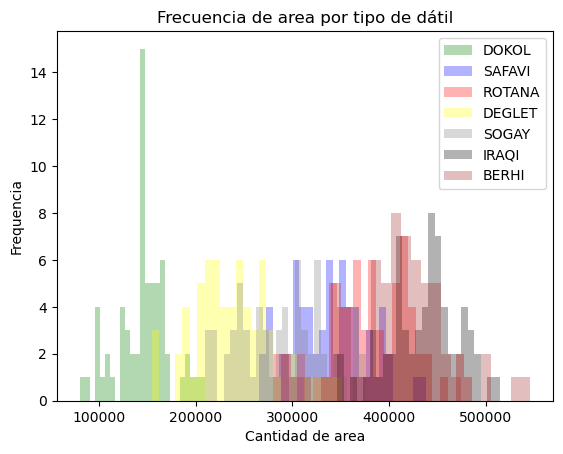

In [41]:
# Histograma de la variable area

x1 = df_fruits1.loc[df_fruits1.target=='DOKOL', 'area']
x2 = df_fruits1.loc[df_fruits1.target=='SAFAVI', 'area']
x3 = df_fruits1.loc[df_fruits1.target=='ROTANA', 'area']
x4 = df_fruits1.loc[df_fruits1.target=='DEGLET', 'area']
x5 = df_fruits1.loc[df_fruits1.target=='SOGAY', 'area']
x6 = df_fruits1.loc[df_fruits1.target=='IRAQI', 'area']
x7 = df_fruits1.loc[df_fruits1.target=='BERHI', 'area']

# Argumentos para los colores

kwargs = dict(alpha=0.3,bins=25)

plt.hist(x1, **kwargs, color='green', label='DOKOL')
plt.hist(x2, **kwargs, color='blue', label='SAFAVI')
plt.hist(x3, **kwargs, color='red', label='ROTANA')
plt.hist(x4, **kwargs, color='yellow', label='DEGLET')
plt.hist(x5, **kwargs, color='grey', label='SOGAY')
plt.hist(x6, **kwargs, color='black', label='IRAQI')
plt.hist(x7, **kwargs, color='brown', label='BERHI')
plt.gca().set(title='Frecuencia de area por tipo de dátil', xlabel='Cantidad de area', ylabel='Frequencia')

plt.legend();

### Preprocesamiento de datos
#### Selección de datos

In [42]:
# Seleccionamos las características a tener en cuenta para crear el modelo
X = columnas_numericas2[['area','roundness']]
y = columnas_no_numericas2['target']

#### División de datos (conjuntos de entrenamiento y de prueba)

In [43]:
# Dividimos los datos, 80% para entrenamiento y 20% para la prueba

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Conjunto de desarrollo, conjunto de validación

X_train, X_val, y_train, y_val = train_test_split(X_train,y_train,test_size=0.25, random_state= 1)

## Creación del modelo de Clasificación

In [44]:
# Selección de k (número de vecinos más cercanos a tener en cuenta)
k = 5

# Creación del modelo
knn_model = KNeighborsClassifier(n_neighbors=k)

# Ajuste del modelo al conjunto de datos de entrenamiento
knn_model.fit(X_train, y_train)

KNeighborsClassifier()

### Prediccion del conjunto de datos de validación

In [45]:
y_pred = knn_model.predict(X_val)

## Validación de resultados

In [46]:
df_resultados =  pd.DataFrame(columns=['Valor Real', 'Valor Predicho'])
df_resultados['Valor Real'] = y_val
df_resultados['Valor Predicho'] = y_pred
df_resultados.head()

,Valor Real,Valor Predicho
68,DEGLET,SOGAY
397,IRAQI,BERHI
208,DOKOL,DOKOL
91,DEGLET,DEGLET
251,DOKOL,DOKOL


### Matriz de confusión

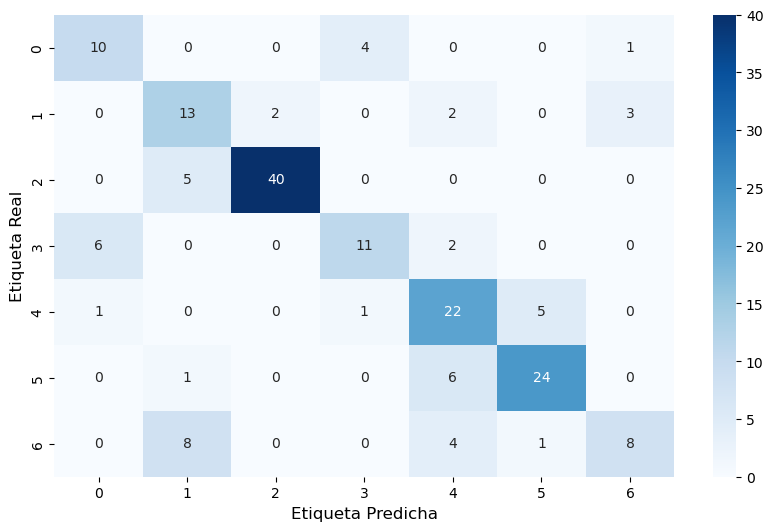

In [47]:
cf_matrix = confusion_matrix(y_val, y_pred)
fig, ax = plt.subplots(figsize=(10,6))
shm = sns.heatmap(cf_matrix, annot=True, cmap='Blues', ax=ax)
shm.set_xlabel('Etiqueta Predicha', fontsize=12)
shm.set_ylabel('Etiqueta Real', fontsize=12)
plt.show()

## Métricas

In [48]:
print(classification_report(y_val, y_pred))

              precision    recall  f1-score   support

       BERHI       0.59      0.67      0.62        15
      DEGLET       0.48      0.65      0.55        20
       DOKOL       0.95      0.89      0.92        45
       IRAQI       0.69      0.58      0.63        19
      ROTANA       0.61      0.76      0.68        29
      SAFAVI       0.80      0.77      0.79        31
       SOGAY       0.67      0.38      0.48        21

    accuracy                           0.71       180
   macro avg       0.68      0.67      0.67       180
weighted avg       0.73      0.71      0.71       180



## Predicción del conjunto de datos de prueba

In [49]:
# Predicción del conjunto de datos de prueba
y_pred = knn_model.predict(X_test)

## Validación de resultados

In [50]:
df_resultados =  pd.DataFrame(columns=['Valor Real', 'Valor Predicho'])
df_resultados['Valor Real'] = y_test
df_resultados['Valor Predicho'] = y_pred
df_resultados.head()

,Valor Real,Valor Predicho
792,SAFAVI,ROTANA
60,BERHI,IRAQI
420,IRAQI,IRAQI
31,BERHI,BERHI
193,DOKOL,DOKOL


### Matriz de confusión

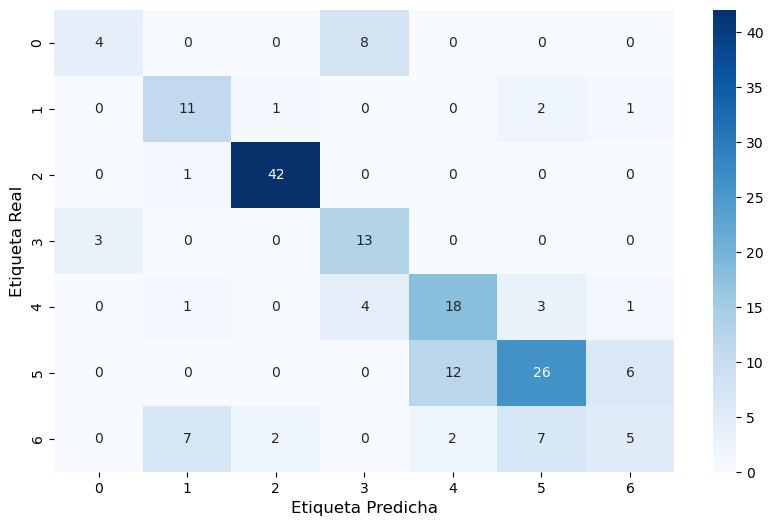

In [51]:
cf_matrix = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize=(10,6))
shm = sns.heatmap(cf_matrix, annot=True, cmap='Blues', ax=ax)
shm.set_xlabel('Etiqueta Predicha', fontsize=12)
shm.set_ylabel('Etiqueta Real', fontsize=12)
plt.show()

## Métricas

In [52]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       BERHI       0.57      0.33      0.42        12
      DEGLET       0.55      0.73      0.63        15
       DOKOL       0.93      0.98      0.95        43
       IRAQI       0.52      0.81      0.63        16
      ROTANA       0.56      0.67      0.61        27
      SAFAVI       0.68      0.59      0.63        44
       SOGAY       0.38      0.22      0.28        23

    accuracy                           0.66       180
   macro avg       0.60      0.62      0.59       180
weighted avg       0.65      0.66      0.65       180



# Conclusión